**Analisis de Datos usando Python**

**Pandas:** https://pandas.pydata.org/

Pandas supports the integration with many file formats or data sources out of the box (csv, excel, sql, json, parquet,…). Importing data from each of these data sources is provided by function with the prefix read_*.

Leer: https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html


**Matplotlib:** https://matplotlib.org/

matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.


Leer: https://matplotlib.org/stable/tutorials/pyplot.html



**Seaborn:** https://seaborn.pydata.org/

Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.

Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. Its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them.

Leer: https://seaborn.pydata.org/tutorial/introduction.html#a-high-level-api-for-statistical-graphics




In [1]:
!pip install pandas matplotlib seaborn


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate random data
data = {
    'attribute1': np.random.randint(low=0, high=100, size=300),
    'attribute2': np.random.randn(300),
    'attribute3': np.random.choice(['A', 'B', 'C', 'D'], size=300),
    'attribute4': np.random.choice(['UNO', 'DOS', 'TRES'], size=300),
    'attribute5': np.random.randn(300),
    'objective': np.random.choice(['CLASE1', 'CLASE2', 'CLASE3'], size=300)
}

# Create a DataFrame
df = pd.DataFrame(data)

df.head()



,attribute1,attribute2,attribute3,attribute4,attribute5,objective
0,44,0.612010,B,UNO,0.105268,CLASE2
1,39,0.381817,C,UNO,-0.344930,CLASE2
2,36,-1.124112,C,DOS,0.983384,CLASE2
3,35,0.708642,B,TRES,2.706761,CLASE3
4,51,-0.766590,B,UNO,2.250903,CLASE1


In [36]:
# prompt: I want to print only the attribute1 from df

print(df['attribute1'])


0      44
1      39
2      36
3      35
4      51
       ..
295     7
296    77
297    57
298    75
299    90
Name: attribute1, Length: 300, dtype: int64


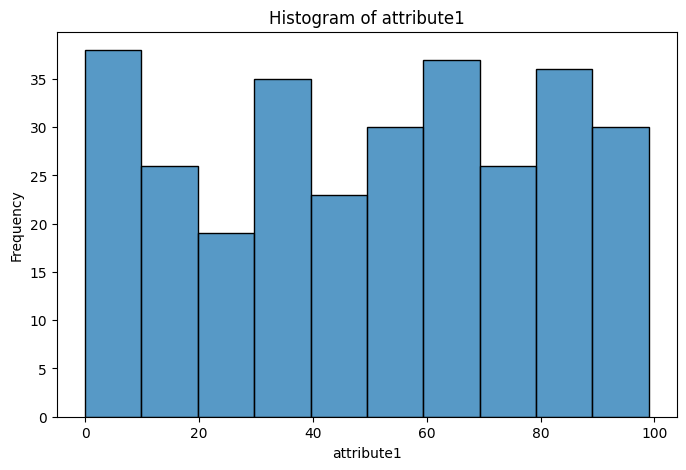

In [37]:
# Create a histogram for attribute1
plt.figure(figsize=(8, 5))
sns.histplot(df['attribute1'], bins=10, kde=False)
plt.xlabel('attribute1')
plt.ylabel('Frequency')
plt.title('Histogram of attribute1')
plt.show()

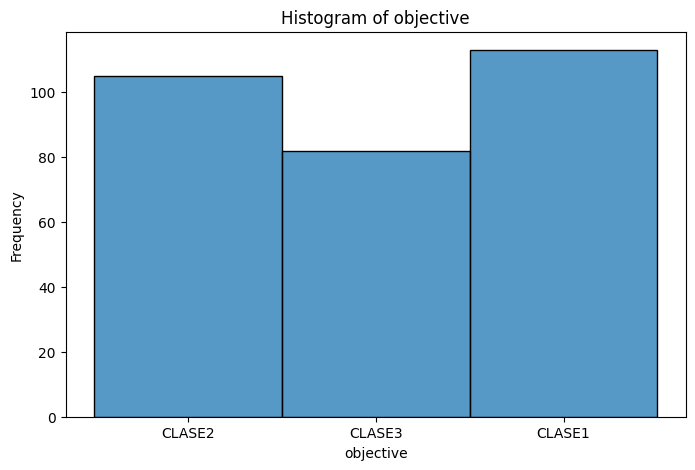

In [38]:
# Create a histogram for objective
plt.figure(figsize=(8, 5))
sns.histplot(df['objective'], bins=10, kde=False)
plt.xlabel('objective')
plt.ylabel('Frequency')
plt.title('Histogram of objective')
plt.show()

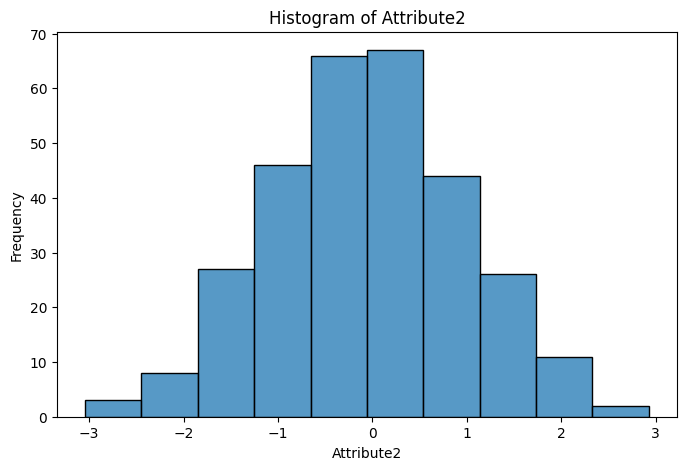

In [39]:
# Create a histogram for attribute2
plt.figure(figsize=(8, 5))
sns.histplot(df['attribute2'], bins=10, kde=False)
plt.xlabel('Attribute2')
plt.ylabel('Frequency')
plt.title('Histogram of Attribute2')
plt.show()




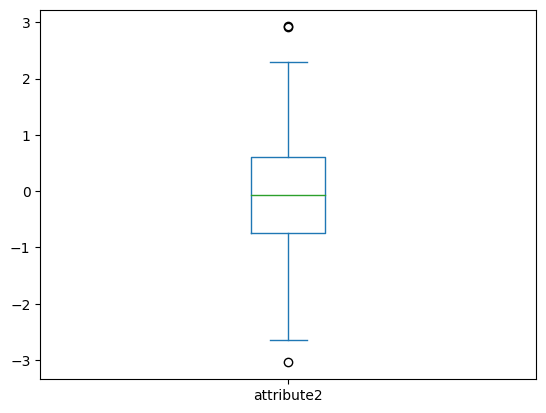

In [40]:
df['attribute2'].plot.box()

plt.show()

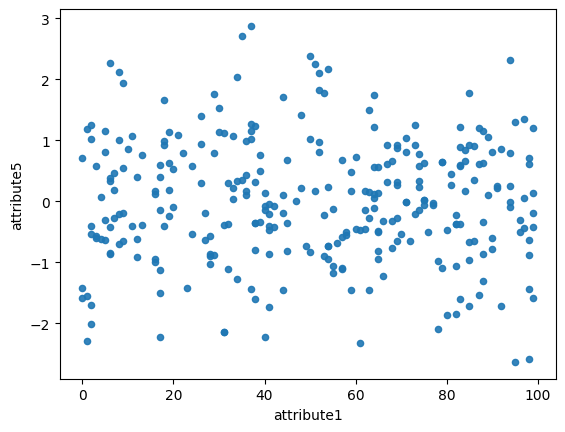

In [41]:
df.plot.scatter(x="attribute1", y="attribute5", alpha=0.9)

plt.show()


In [42]:
df[["attribute1", "attribute2", "attribute5"]].describe()

,attribute1,attribute2,attribute5
count,300.000000,300.000000,300.000000
mean,50.560000,-0.065411,0.006834
std,29.526583,1.029835,1.010757
min,0.000000,-3.043136,-2.631558
25%,27.000000,-0.744771,-0.636387
50%,52.500000,-0.065679,-0.008876
75%,75.000000,0.601935,0.703971
max,99.000000,2.926305,2.873930


**Calculo de outliers**

In [43]:
# Identify outliers using z-score
z_scores = np.abs((df['attribute2'] - df['attribute2'].mean()) / df['attribute2'].std())
outliers = df[z_scores > 2.5]

#outliers

df_cleaned = df[z_scores <= 2.5]

df_cleaned.head()

,attribute1,attribute2,attribute3,attribute4,attribute5,objective
0,44,0.612010,B,UNO,0.105268,CLASE2
1,39,0.381817,C,UNO,-0.344930,CLASE2
2,36,-1.124112,C,DOS,0.983384,CLASE2
3,35,0.708642,B,TRES,2.706761,CLASE3
4,51,-0.766590,B,UNO,2.250903,CLASE1


Calculo quantile(0.25):

Calcular la posición del primer percentil: Usamos la fórmula P=(n−1)×p

donde:

n es el número de datos (10).

p es el percentil que estamos calculando (0.25 para el percentil 25).

Así que,

*P=(10−1)×0.25=9×0.25=2.25.*

In [44]:
df['attribute2'].quantile(0.25)

-0.7447709562987949

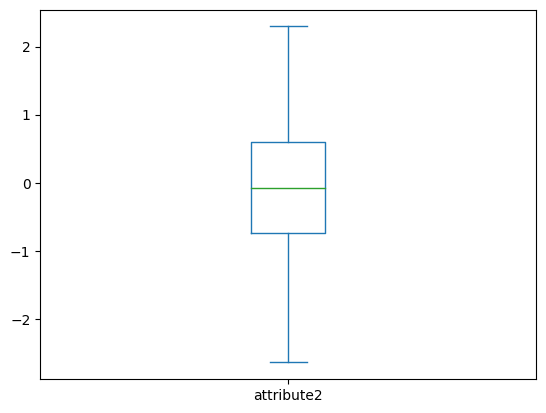

In [45]:
# 2. Using the boxplot method:

# Create a boxplot of the 'attribute2' column
#df['attribute2'].plot.box()
#plt.show()

# Identify outliers based on the boxplot (e.g., data points outside the whiskers)
outliers = df[df['attribute2'] < df['attribute2'].quantile(0.25) - 1.5 * (df['attribute2'].quantile(0.75) - df['attribute2'].quantile(0.25))]
outliers2 = df[df['attribute2'] > df['attribute2'].quantile(0.75) + 1.5 * (df['attribute2'].quantile(0.75) - df['attribute2'].quantile(0.25))]

# Use concat to combine the outlier dataframes
outliers = pd.concat([outliers, outliers2])

# Remove outliers from the DataFrame
df_cleaned = df[~df.index.isin(outliers.index)]

df_cleaned['attribute2'].plot.box()
plt.show()

In [46]:
outliers

,attribute1,attribute2,attribute3,attribute4,attribute5,objective
134,40,-3.043136,C,TRES,-0.080923,CLASE3
48,65,2.926305,A,TRES,-0.807132,CLASE3
219,82,2.912963,A,DOS,-1.845628,CLASE3


The **interquartile range (IQR)** is a measure of statistical dispersion, which is the spread of the middle 50% of a data set. It is calculated as the difference between the third quartile (Q3, or the 75th percentile) and the first quartile (Q1, or the 25th percentile). The IQR is used to measure variability by dividing a data set into quartiles and is a robust measure of variability because it is not influenced by outliers or extreme values.

In [14]:
# 3. Using the IQR method:

# Calculate the interquartile range (IQR) for the 'attribute2' column
IQR = df['attribute2'].quantile(0.75) - df['attribute2'].quantile(0.25)

# Define a threshold for outlier identification (e.g., 1.5 * IQR)
threshold = 1.5 * IQR

# Identify outliers based on the threshold
outliers1 = df[df['attribute2'] < df['attribute2'].quantile(0.25) - threshold] # store lower outliers
outliers2 = df[df['attribute2'] > df['attribute2'].quantile(0.75) + threshold] # store upper outliers

# Use concat to combine the outlier dataframes
outliers = pd.concat([outliers1, outliers2])

# Remove outliers from the DataFrame
df_cleaned = df[~df.index.isin(outliers.index)]

In [15]:
df_cleaned.count()

attribute1    299
attribute2    299
attribute3    299
attribute4    299
attribute5    299
objective     299
dtype: int64

In [16]:
# Remove duplicate records
df_cleaned = df_cleaned.drop_duplicates()

df_cleaned.count()


attribute1    299
attribute2    299
attribute3    299
attribute4    299
attribute5    299
objective     299
dtype: int64

Working with NA:
https://pandas.pydata.org/docs/user_guide/missing_data.html#filling-missing-data



In [17]:
df_cleaned.iloc[2:4, 0] = np.nan

df_cleaned.head(10)

,attribute1,attribute2,attribute3,attribute4,attribute5,objective
0,96.0,0.602796,B,TRES,0.213119,CLASE1
1,75.0,0.050052,C,TRES,0.481968,CLASE1
2,NaN,-0.597878,B,DOS,-0.123359,CLASE1
3,NaN,1.393847,C,DOS,1.515743,CLASE2
4,39.0,0.299361,C,TRES,-0.037081,CLASE2
5,42.0,-0.503303,C,DOS,-1.392947,CLASE2
6,79.0,0.311930,D,DOS,0.507638,CLASE3
7,58.0,-1.081672,C,UNO,0.278626,CLASE3
8,77.0,0.101398,D,UNO,0.011100,CLASE3
9,97.0,-2.232755,C,UNO,-0.235398,CLASE3


In [18]:
# prompt: I want a code to replace in the column attribute1 the NA values with the mean value de the column attribute1

import numpy as np

df_cleaned['attribute1'].fillna(np.mean(df_cleaned['attribute1']), inplace=True)

df_cleaned.head(10)


,attribute1,attribute2,attribute3,attribute4,attribute5,objective
0,96.000000,0.602796,B,TRES,0.213119,CLASE1
1,75.000000,0.050052,C,TRES,0.481968,CLASE1
2,52.299663,-0.597878,B,DOS,-0.123359,CLASE1
3,52.299663,1.393847,C,DOS,1.515743,CLASE2
4,39.000000,0.299361,C,TRES,-0.037081,CLASE2
5,42.000000,-0.503303,C,DOS,-1.392947,CLASE2
6,79.000000,0.311930,D,DOS,0.507638,CLASE3
7,58.000000,-1.081672,C,UNO,0.278626,CLASE3
8,77.000000,0.101398,D,UNO,0.011100,CLASE3
9,97.000000,-2.232755,C,UNO,-0.235398,CLASE3


In [19]:
df_cleaned.iloc[2:4, 0] = np.nan

df_cleaned.head(10)

,attribute1,attribute2,attribute3,attribute4,attribute5,objective
0,96.0,0.602796,B,TRES,0.213119,CLASE1
1,75.0,0.050052,C,TRES,0.481968,CLASE1
2,NaN,-0.597878,B,DOS,-0.123359,CLASE1
3,NaN,1.393847,C,DOS,1.515743,CLASE2
4,39.0,0.299361,C,TRES,-0.037081,CLASE2
5,42.0,-0.503303,C,DOS,-1.392947,CLASE2
6,79.0,0.311930,D,DOS,0.507638,CLASE3
7,58.0,-1.081672,C,UNO,0.278626,CLASE3
8,77.0,0.101398,D,UNO,0.011100,CLASE3
9,97.0,-2.232755,C,UNO,-0.235398,CLASE3


In [20]:
# Find and eliminate records with missing fields
df_cleaned = df_cleaned.dropna()

df_cleaned.count()

attribute1    297
attribute2    297
attribute3    297
attribute4    297
attribute5    297
objective     297
dtype: int64

In [21]:
df_cleaned.head(10)

,attribute1,attribute2,attribute3,attribute4,attribute5,objective
0,96.0,0.602796,B,TRES,0.213119,CLASE1
1,75.0,0.050052,C,TRES,0.481968,CLASE1
4,39.0,0.299361,C,TRES,-0.037081,CLASE2
5,42.0,-0.503303,C,DOS,-1.392947,CLASE2
6,79.0,0.311930,D,DOS,0.507638,CLASE3
7,58.0,-1.081672,C,UNO,0.278626,CLASE3
8,77.0,0.101398,D,UNO,0.011100,CLASE3
9,97.0,-2.232755,C,UNO,-0.235398,CLASE3
10,38.0,-0.845446,C,TRES,-1.086384,CLASE2
11,45.0,0.706161,C,UNO,-0.397237,CLASE3


In [22]:
# Encode categorical values
df_cleaned['attribute3'] = df_cleaned['attribute3'].astype('category').cat.codes
df_cleaned['attribute4'] = df_cleaned['attribute4'].astype('category').cat.codes

df_cleaned.head(10)

<ipython-input-22-da7df24905b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['attribute3'] = df_cleaned['attribute3'].astype('category').cat.codes
<ipython-input-22-da7df24905b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['attribute4'] = df_cleaned['attribute4'].astype('category').cat.codes


,attribute1,attribute2,attribute3,attribute4,attribute5,objective
0,96.0,0.602796,1,1,0.213119,CLASE1
1,75.0,0.050052,2,1,0.481968,CLASE1
4,39.0,0.299361,2,1,-0.037081,CLASE2
5,42.0,-0.503303,2,0,-1.392947,CLASE2
6,79.0,0.311930,3,0,0.507638,CLASE3
7,58.0,-1.081672,2,2,0.278626,CLASE3
8,77.0,0.101398,3,2,0.011100,CLASE3
9,97.0,-2.232755,2,2,-0.235398,CLASE3
10,38.0,-0.845446,2,1,-1.086384,CLASE2
11,45.0,0.706161,2,2,-0.397237,CLASE3


In [23]:
# Normalize numerical values
df_cleaned['attribute2'] = (df_cleaned['attribute2'] - df_cleaned['attribute2'].min()) / (df_cleaned['attribute2'].max() - df_cleaned['attribute2'].min())
df_cleaned['attribute5'] = (df_cleaned['attribute5'] - df_cleaned['attribute5'].min()) / (df_cleaned['attribute5'].max() - df_cleaned['attribute5'].min())

df_cleaned.head()

,attribute1,attribute2,attribute3,attribute4,attribute5,objective
0,96.0,0.600902,1,1,0.512994,CLASE1
1,75.0,0.483766,2,1,0.563683,CLASE1
4,39.0,0.536599,2,1,0.465820,CLASE2
5,42.0,0.366501,2,0,0.210182,CLASE2
6,79.0,0.539263,3,0,0.568523,CLASE3


In [24]:
# Find the correlation between two variables
correlation = df_cleaned['attribute1'].corr(df_cleaned['attribute5'])

correlation

0.014981845511452214

In [25]:
numerical_columns = ['attribute1', 'attribute2', 'attribute5']
correlation_matrix = df_cleaned[numerical_columns].corr()

print(correlation_matrix)


            attribute1  attribute2  attribute5
attribute1    1.000000    0.058611    0.014982
attribute2    0.058611    1.000000   -0.082140
attribute5    0.014982   -0.082140    1.000000


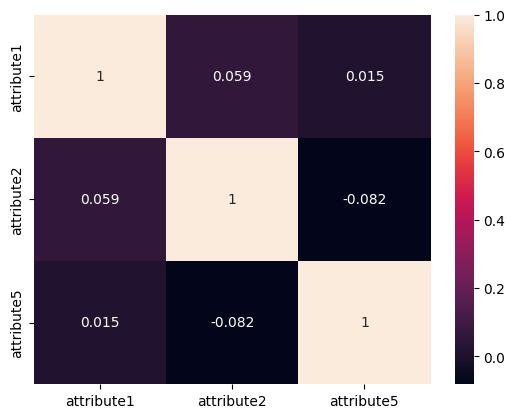

In [26]:
import matplotlib.pyplot as plt
sns.heatmap(correlation_matrix, annot=True)
plt.show()


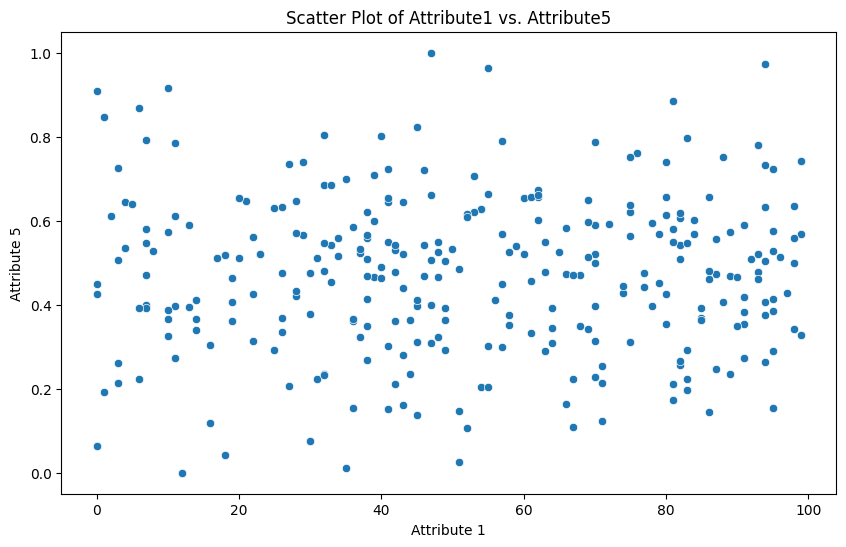

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='attribute1', y='attribute5', data=df_cleaned)
plt.title('Scatter Plot of Attribute1 vs. Attribute5')
plt.xlabel('Attribute 1')
plt.ylabel('Attribute 5')
plt.show()

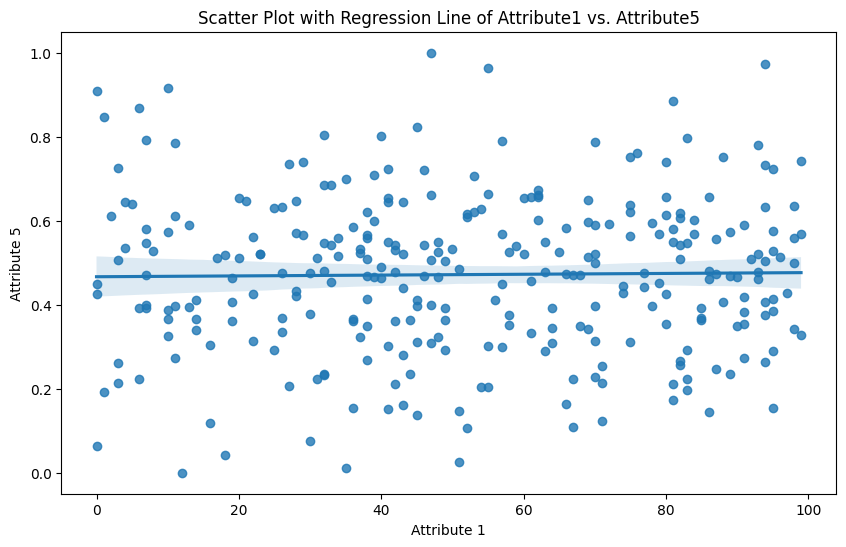

In [28]:
# Adding a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='attribute1', y='attribute5', data=df_cleaned)
plt.title('Scatter Plot with Regression Line of Attribute1 vs. Attribute5')
plt.xlabel('Attribute 1')
plt.ylabel('Attribute 5')
plt.show()

In [29]:
# Print the results
print('Outliers:', outliers)
print('Duplicate records:', df_cleaned.duplicated().sum())
print('Missing values:', df_cleaned.isnull().sum())
print('Encoded categorical values:', df_cleaned[['attribute3', 'attribute4']])
print('Normalized numerical values:', df_cleaned[['attribute2', 'attribute5']])
print('Correlation between attribute2 and attribute5:', correlation)

Outliers:     attribute1  attribute2 attribute3 attribute4  attribute5 objective
35          93    -2.55575          C        UNO   -0.868489    CLASE2
Duplicate records: 0
Missing values: attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
objective     0
dtype: int64
Encoded categorical values:      attribute3  attribute4
0             1           1
1             2           1
4             2           1
5             2           0
6             3           0
..          ...         ...
295           2           1
296           0           1
297           0           1
298           1           2
299           2           1

[297 rows x 2 columns]
Normalized numerical values:      attribute2  attribute5
0      0.600902    0.512994
1      0.483766    0.563683
4      0.536599    0.465820
5      0.366501    0.210182
6      0.539263    0.568523
..          ...         ...
295    0.426994    0.531934
296    0.381475    0.707473
297    0.716922    0.449235
298  

In [30]:
df_cleaned['objective'] = df_cleaned['objective'].str.lower()

df_cleaned.head()

,attribute1,attribute2,attribute3,attribute4,attribute5,objective
0,96.0,0.600902,1,1,0.512994,clase1
1,75.0,0.483766,2,1,0.563683,clase1
4,39.0,0.536599,2,1,0.465820,clase2
5,42.0,0.366501,2,0,0.210182,clase2
6,79.0,0.539263,3,0,0.568523,clase3


In [31]:
# prompt: I want a python code to load a csv file from the local drive and upload it as dataframe

from google.colab import files
import pandas as pd

# Load the CSV file from the local drive
uploaded = files.upload()

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(list(uploaded.keys())[0])

# Display the DataFrame
df.head()


Saving diabetes.csv to diabetes.csv


,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,NaN,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


Preg: Número de embarazos

Plas: Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia a la glucosa oral

Pres: Presión arterial diastólica (mm Hg): Cuando su corazón está en reposo, entre latidos, su presión arterial baja

Skin: Espesor del pliegue cutáneo del tríceps (mm)

Insu: Insulina sérica de 2 horas (mu U / ml): Es una prueba que mide cuánta insulina tiene en la sangre.

mass: Índice de masa corporal (peso en kg / (altura en m) ^ 2)

Pedi: Función pedigrí de la diabetes: Una función que califica la probabilidad de diabetes según los antecedentes familiares.

Age: Edad (años)

Variable de clase (0 o 1): El paciente muestra signos de diabetes (1), (0) en caso contrario.


In [32]:
df.count()

preg     768
plas     768
pres     768
skin     768
insu     768
mass     766
pedi     768
age      768
class    768
dtype: int64

Tarea:
1. Atributos correlacionados
2. Outliers (alguna de las tres formas de identificar outliers)
3. datos duplicados
4. campos que faltantes (reemplazar los datos que faltan con la media)



In [33]:
# Find and eliminate records with missing fields
df = df.dropna()

df.count()

preg     766
plas     766
pres     766
skin     766
insu     766
mass     766
pedi     766
age      766
class    766
dtype: int64